# The CIFAR-10 Dataset

CIFAR-10 consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. We are using the dataset from Keras so we won't see the batches directly but they are there.

The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert class vectors to binary vectors
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

C:\Users\niall\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


### Data
A 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

### Labels
A list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data. There 10 classifications within the dataset airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

### Label Names
The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
A 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [3]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


## Displaying the images

To display the images contained within the batches we us matplotlib what this does is takes the RGB (Red, Green, Blue) values in 3 overlapping layers all with different values for each pixel or plot, the combination of these 3 varying values allows the images to be displayed.

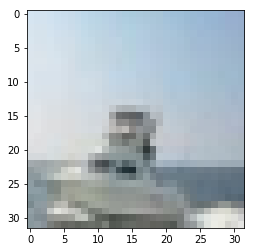

In [32]:
import matplotlib.pyplot as plt

example = 100
# plot a chosen image based on index
img = example
plt.imshow(X_train[img], interpolation='none')
plt.show()

As we can see the plots of the image displayed resemble a ship on water.

## Neural Network



In [15]:
# Definitions for training
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Activation
from keras.layers import Dropout

img_size = 32
img_channels = 3
nb_classes = 10
batch_size = 128
epoch_max = 15
drop_rate = 0.2

### BatchNormalization
Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

In [5]:
# Adapted from: http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/11_NN_Regularization/11_NN_Regularization.html
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D

model_cnn = Sequential()

# convolutional hidden layers
for i in range(7):
    model_cnn.add(Convolution2D(32, 3, 3, 
                        input_shape=(img_size, img_size, img_channels), 
                        border_mode='same', activation='relu'))
    
    if (i + 1) % 2 == 0:
        model_cnn.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))
model_cnn.add(Dropout(drop_rate))
    
print('Output shape of last convolution layers: {0}'.format(model_cnn.output_shape))
model_cnn.add(Flatten())

# fully connected hidden layers
for i in range(2):
    model_cnn.add(Dense(512))
    model_cnn.add(BatchNormalization(mode=0))
    model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(drop_rate))

# output layer
model_cnn.add(Dense(nb_classes, activation='softmax'))

# compile model
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model summary
model_cnn.summary()

C:\Users\niall\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\niall\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`
  


Output shape of last convolution layers: (None, 4, 4, 32)


C:\Users\niall\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization()`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
__________

In [6]:
# Training
model_cnn.fit(x=X_train,y=Y_train, epochs=20)

Epoch 1/20
50000/50000 [==============================] - 314s 6ms/step - loss: 1.5819 - acc: 0.4299
Epoch 2/20
50000/50000 [==============================] - 310s 6ms/step - loss: 1.1493 - acc: 0.5888
Epoch 3/20
50000/50000 [==============================] - 305s 6ms/step - loss: 0.9812 - acc: 0.6517
Epoch 4/20
50000/50000 [==============================] - 318s 6ms/step - loss: 0.8710 - acc: 0.6907
Epoch 5/20
50000/50000 [==============================] - 310s 6ms/step - loss: 0.8003 - acc: 0.7185
Epoch 6/20
50000/50000 [==============================] - 303s 6ms/step - loss: 0.7437 - acc: 0.7397 5s -
Epoch 7/20
50000/50000 [==============================] - 302s 6ms/step - loss: 0.6944 - acc: 0.7584
Epoch 8/20
50000/50000 [==============================] - 315s 6ms/step - loss: 0.6550 - acc: 0.7700
Epoch 9/20
50000/50000 [==============================] - 313s 6ms/step - loss: 0.6154 - acc: 0.7819
Epoch 10/20
50000/50000 [==============================] - 305s 6ms/step - loss: 0.588

In [7]:
# Save weights in model to  avoid retraining
model_cnn.save("CIFAR_model_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
# Load saved model
from keras.models import load_model

model = load_model('CIFAR_model_cnn.h5')
print("Loaded model from disk")

Loaded model from disk


In [9]:
# Evaluate unsaved model
scores = model_cnn.evaluate(X_test, Y_test, verbose = 0)
print("Model Error Percentage: %.2f%%" %(100 - scores[1] * 100))

Model Error Percentage: 21.62%


In [10]:
# Evaluate loaded model on test data
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(X_test, Y_test, verbose=0)
print("Loaded Model Error Percentage: %.2f%%" %(100 - scores[1] * 100))

Loaded Model Error Percentage: 21.62%


## End